<a href="https://colab.research.google.com/github/sarthaksahani/text_assignment/blob/main/Image_Classification_with_CNN_using_Keras_and_Tensorflow2_by_Sarthak_Sahani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Tensorflow2 and Keras :

## Project based on concept of Machine Learning :

* Supervised Learning using Convolutional Neural Networks(CNN)

* Classification Project 

* Multi-layer Perceptron (MLP)

>> *Created by : Sarthak Sahani*



### Convolution Neural Network With Keras and TensorFlow 2

## Prerequisites :

This project assumes that you are familiar with the basic concepts and theory of Convolutional Neural Networks(CNN) and Image Processing.

* In case, you dont have good understanding about CNNs, you can check out the following link to get some knowledge about CNNs:

[Click Here for the article related to CNNs](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)

## This project is divided into the following 5 Stages and the model is build in 3 parts :


### 3 PARTS OF THE MODEL:

* TOP Part : Convolutional Layers
* MIDDLE Part : Flatten Layer
* BOTTOM Part : Dense Layers



### 6 STAGES OF MODEL_BUILDING IN THIS PROJECT:

1. Importing libraries and Understanding the data.

2. Preprocessing of Data

3. Creating the Convolution model

4. Training the model.

5. Testing and evaluating Model

6. Improving the performance.


# Overview of the Dataset:

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. 
- There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. 
* The test batch contains exactly 1000 randomly-selected images from each class. 
* The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. 
* Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:



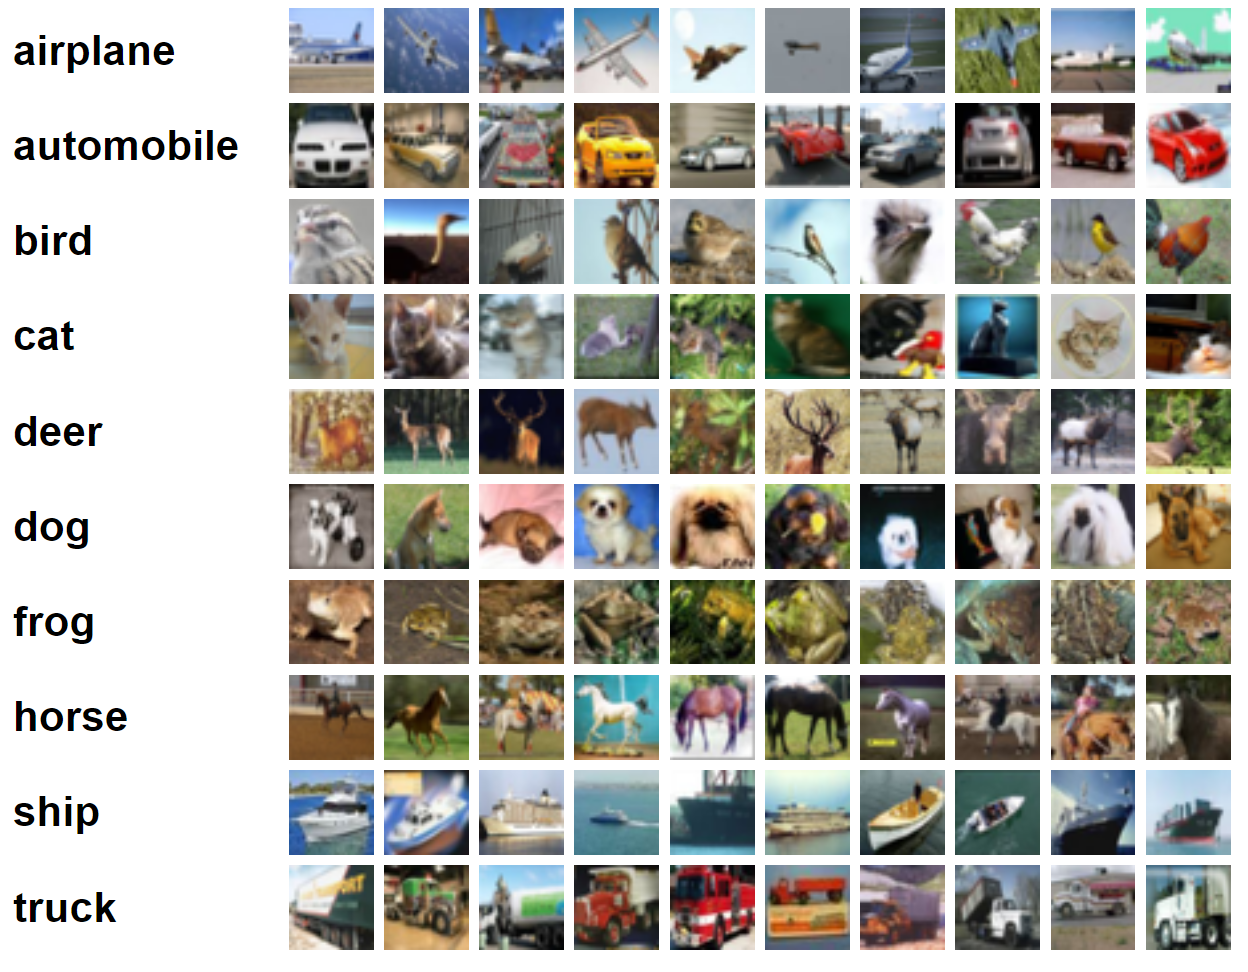

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.


[Check out the CIFAR10 Dataset details on its official page](https://www.cs.toronto.edu/~kriz/cifar.html)

# STAGE 1 : Importing essentials and Exploring the data:

####  Importing the essential required libraries and modules :

In [ ]:
# Importing the essentials here :

# Dataset :
from tensorflow.keras.datasets import cifar10

# Model :
from tensorflow.keras.models import Sequential

# Convolution Layers :
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

# Dense Layers :
from tensorflow.keras.layers import Dense, Dropout

# Optimizers :
from tensorflow.keras.optimizers import Adam

# for data pre-processing :
from tensorflow.keras.utils import to_categorical

# Helper Libraries :
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
# Fetching the Cifar10 data :

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [ ]:
# Checking the shape of the data :

# Numerical Exploration of data

print(f"Training Images Shape: {x_train.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Test images shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training Images Shape: (50000, 32, 32, 3)
Training Labels Shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


* x consist of 2D images of size 32 x 32 and since it is colored images so it has 3 channels for RGB : Red, Green, Blue

* y contains 1D numerical value of those images. so, it is numerical and 1D

> The dataset has 50000 training dataset and 10000 testing dataset.

In [ ]:
# Defining number of classes and class labels:

NUM_CLASSES = 10 # Since 10 labels in output layer.

classes = [
           'airplane', 
           'automobile', 
           'bird', 
           'cat', 
           'deer',
           'dog', 
           'frog', 
           'horse', 
           'ship', 
           'truck'
           ]

### Visualizing the dataset:

Visualizing the data is always a good step to begin data exploration process.

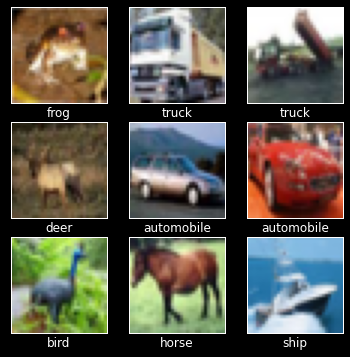

In [ ]:
## visualizing the dataset: # Pictorial Exploration of Data : Plottting images

plt.style.use('dark_background') # for dark background behind the plotted images.

#Checking first 9 images of the dataset:

plt.figure(figsize=(6, 6))

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i]) # The Image
  plt.xlabel(classes[y_train[i].item()]) # Their labels
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

plt.show();

# STAGE 2 : Preprocessing the data :

#### Normalise the data:

Normalisation/Scaling is done to make sure all data points are within the common scale. e.g. = (0 and 1) or (-1 and +1)

and This is done because computation becomes easier and simplier when the values is between -1 to + or 0 to 1

> This is also called Scaling.

In [ ]:
# Normalising the images : First convert it to float and then divide it by 255 to normalize it.

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# Confirming whether images normalised or not :

# Checking Minimum and Maximmum values :

print("X Train :" , "Datatype :", x_train[0].dtype, "\tMaximum :", x_train[0].max(), "\tMinimum :", x_train[0].min())
print("X Test :" , "Datatype :", x_test[0].dtype, "\tMaximum :", x_test[0].max(), "\tMinimum :", x_test[0].min())

X Train : Datatype : float32 	Maximum : 1.0 	Minimum : 0.0
X Test : Datatype : float32 	Maximum : 1.0 	Minimum : 0.050980393


#### **Difference between categorical_crossentropy and sparse_categorical_crossentropy :**

Before we proceed to one-hot encoding of the labels, it is important to mention here that keras provides two loss functions to deal with multi-class categorical classification 
- categorical_crossentropy -- use this when you have one-hot enoded labels
- sparse_categorical_crossentropy -- use this when you have integer labels (like [1,4,5,7])

>> Understanding the difference between both and their uses in keras is very important because the performance of the model depends it.


In [ ]:
# Checking type of our labels to select which entropy to opt for :
# We know X >> images   Y >> Labels

# Currently, this is how our labels look:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Here our data label is in integer form so we should with:
> sparse_categorical_crossentropy

but I personally always prefer going with one-hot encoded labels i.e.:
> categorical_crossentropy

because It can help us to capture probability also.

In [ ]:
# Performing One-hot Encoding to the labels :

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [ ]:
# This is how our labels looks after one-hot encoding :

y_train[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

till here.. We are done with data pre-processing and we one-hot coded our labels too.

* Now we will train our model.

# STAGE 3 : Building the Model:

In [ ]:
model = Sequential()

In [ ]:
from tensorflow.keras.layers import Convolution2D

# Note: Conv2D and Convolution2D are same with same parameters but just different names.

## PART 1 : TOP PART OF THE MODEL : Convolutional Layers 

In [ ]:
# Adding first convolution layer :

model.add(Conv2D(
    filters = 32,
    kernel_size = (3,3), # Matrix size : 3x3
    strides = (1,1), # 1:1 >> Output equals to Input
    padding = 'same',
    activation = 'relu', # applies weights(activation function) on filters. 
    input_shape = (32,32,3) # giving input layer so defining shape.
    )
)

In [ ]:
# Adding Pooling Layer :

model.add(MaxPool2D(
    pool_size = (2,2),
    padding = 'same'
    )
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Adding second Convolution Layer :

model.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same'))

# Adding another Pooling layer :

model.add(MaxPool2D(2,2))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Adding third Convolution layer :

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
Total params: 28,640
Trainable params: 28,640
Non-traina

## PART 2 : MIDDLE PART OF THE MODEL : Flatten Layer

#### Flattening the data and training the model : 

In [ ]:
# flattening the output from convolutional layers :
model.add(Flatten())

In [ ]:
# Rechecking the summary of the output again :

model.summary()

# Since last added Conv2D Layer has shape of : (8,8, 64)
# it should have shape of 64*8*8 = 4096

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 4096)              0

Flatten() function simpply unfolds the last convolution in flatten (single row) form with changes in numnber of nodes.

In [ ]:
# Quick tip to access individual layers and check their input and outputs :

model.layers # this returns list of all layers.

In order access any layer, Use their index :

* Index of first layer : 0
* Index of second layer : 1
* Index of last layer : -1

In [ ]:
# Accessing last addded Flatten layer and checking it shape :

model.layers[-1].output.shape

TensorShape([None, 4096])

## PART 3: BOTTOM PART OF THE MODEL : Dense Layers


In [ ]:
# Now adding dense layers : 
# PS: Dense layers which are fully connected layers used mainly for classification.

model.add(Dense(256, activation = 'relu')) # Dense layer

# Output layer :
model.add(Dense(NUM_CLASSES, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 4096)              0

Here in the summary, We can see that:

* First part (TOP) of our model is : **Convolutional layers Part**
* Middle part (MID) of our model is : ** Flatten Layer**
* Last part (BOTTOM)  of the model is : **Dense Layer Part**

> *Convolution part* learns the features of the input data.

> *Flatten layer part* simply flatten the output of last Convolution layer in single line shape.

> *Dense layer part* predicts the output. That is They are used for Prediction.

# STAGE 4 : Compiling and Training the Model : 

In [ ]:
# Adding optimizer :

optimizer = Adam(learning_rate=0.01) # It default learning rate is also 0.01

In [ ]:
# Compiling the model :

model.compile(
    optimizer = optimizer,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

#### Training the model :

In [ ]:
# Pre-defining some of the parameters : 

EPOCHS = 50
BATCH_SIZE = 128
 

In [ ]:
# Make sure GPU is available and connected by training the model :

T_model = model.fit(
    x_train,
    y_train,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    shuffle = True,
    validation_data = (x_test, y_test)
)

Epoch 1/50
391/391 [==============================] - 9s 13ms/step - loss: 1.7847 - accuracy: 0.3426 - val_loss: 1.5349 - val_accuracy: 0.4395
Epoch 2/50
391/391 [==============================] - 3s 8ms/step - loss: 1.4887 - accuracy: 0.4566 - val_loss: 1.4457 - val_accuracy: 0.4790
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.3903 - accuracy: 0.4943 - val_loss: 1.3912 - val_accuracy: 0.4954
Epoch 4/50
391/391 [==============================] - 3s 6ms/step - loss: 1.3329 - accuracy: 0.5195 - val_loss: 1.4069 - val_accuracy: 0.4915
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 1.2961 - accuracy: 0.5343 - val_loss: 1.3693 - val_accuracy: 0.5034
Epoch 6/50
391/391 [==============================] - 3s 7ms/step - loss: 1.2545 - accuracy: 0.5493 - val_loss: 1.3613 - val_accuracy: 0.5211
Epoch 7/50
391/391 [==============================] - 3s 7ms/step - loss: 1.2200 - accuracy: 0.5653 - val_loss: 1.4281 - val_accuracy: 0.4885
Epoch

Here in the epochs , we can see that accuracy is continuously increasing with each and every epochs.

This means the model is dealing with Overfitting issue.

# STAGE 5 : Evaluation of the performance of the model :

In [ ]:
## function to plot loss and accuracy

def plot_history(history): 
  fig = plt.figure(figsize=(10, 4))
  plt.style.use('classic')
  
  # Accuracy plot :
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy of Model')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'test'], loc='lower right')
  plt.grid(False)

  # Loss plot : 
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss of Model')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['train', 'test'], loc='upper right')
  plt.grid(False)

  plt.tight_layout()

  fig.show();

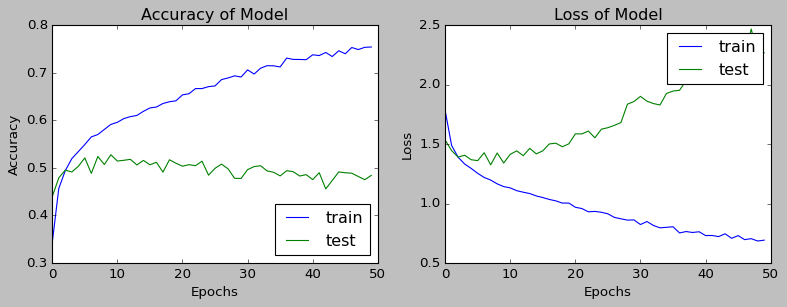

In [ ]:
# Plotting :

plot_history(T_model)

The above plot clearly show that the model is dealing with overfitting.

# STAGE 6 : Improving the Performance of the model :

#### **Lets add few more things to deal with overfitting**
- Change the size and shape of conv and dense layers or add more layers
- Add dropout layers
- Add a simple learning rate scheduler to change learning rate as the training progresses

In [ ]:
# Creating new model :

model2 = Sequential()

In [ ]:
# PART 1 : Top part of the model
        
#  Adding input layers : 
#   First Convolutional and Pooling layer
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPool2D((2, 2)))

In [ ]:
#   Adding second Convolutional and Pooling layer along with DropOut Layer :

model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(MaxPool2D((2, 2)))

#  Adding dropout layer with 30% dropout rate:
model2.add(Dropout(0.3)) 

In [ ]:
#   Adding third Convolutional and Pooling layer along with DropOut Layer :

model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(MaxPool2D((2, 2)))

#  Adding dropout layer with 30% dropout rate:
model2.add(Dropout(0.3)) 

In [ ]:
# PART 2 : Middle part of the model

#   Adding flatten layer
model2.add(Flatten())

In [ ]:
# PART 3 : Bottom part of the model 

#   Adding dense layer:
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.3))

#   Adding output layer
model2.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)         

#### **Now Adding a simple Learning Rate Scheduler Callback before compiling the model**

* Learning rate scheduler is a callback which  helps to change the learning rate of the model in between the training.

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
# learning rate schedule

# Defining a function whose learning rate will decrease with increase in the number of epochs time :

def simple_decay(epoch, lr):

  if epoch < 30:
    lrate = lr
  elif epoch < 60:
    lrate = 0.0005
  else:
    lrate = 0.0001
  return lrate

# Here learning rate changes after every 30 epochs. 
# ( first 30 : same as define, next 30 : lr = 0.0005, then further = 0.0001)

In [ ]:
## create scheduler
scheduler = LearningRateScheduler(simple_decay)

In [ ]:
callbacks = [scheduler]

In [ ]:
# Adding Optimizer :

optimizer = Adam(learning_rate=0.001)

In [ ]:
# Compiling the model :

model2.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
              )

In [ ]:
# Training the model :

T_model2 = model2.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, y_test),
    callbacks=callbacks
  )

Epoch 1/100
391/391 [==============================] - 4s 8ms/step - loss: 1.6884 - accuracy: 0.3771 - val_loss: 1.3596 - val_accuracy: 0.5136 - lr: 0.0010
Epoch 2/100
391/391 [==============================] - 3s 7ms/step - loss: 1.3352 - accuracy: 0.5180 - val_loss: 1.1541 - val_accuracy: 0.5880 - lr: 0.0010
Epoch 3/100
391/391 [==============================] - 3s 7ms/step - loss: 1.1895 - accuracy: 0.5753 - val_loss: 1.0647 - val_accuracy: 0.6236 - lr: 0.0010
Epoch 4/100
391/391 [==============================] - 3s 8ms/step - loss: 1.0843 - accuracy: 0.6137 - val_loss: 0.9534 - val_accuracy: 0.6725 - lr: 0.0010
Epoch 5/100
391/391 [==============================] - 3s 7ms/step - loss: 1.0015 - accuracy: 0.6453 - val_loss: 0.9118 - val_accuracy: 0.6870 - lr: 0.0010
Epoch 6/100
391/391 [==============================] - 3s 7ms/step - loss: 0.9397 - accuracy: 0.6674 - val_loss: 0.8622 - val_accuracy: 0.7031 - lr: 0.0010
Epoch 7/100
391/391 [==============================] - 3s 7ms/st

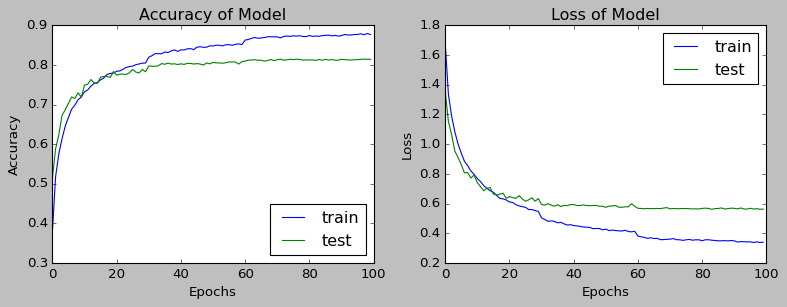

In [ ]:
# Plotting results :

plot_history(T_model2)

Here in the plots, we can see that after every 30 epochs, there is change in accuracy and loss and it is due to change in learning rate after 30, 60 epochs that we defined in simple_decoy() function.

* Accuracy increased after 30 and after 60 epochs.
* Loss decreased after 30 and after 60 epochs.

but still there is lot of scope of improvement in this model.

### Things that can be done and experimented in order to increase improvement of the model :

### **Experiments**

- Experiment 1 ✈ Try different model arcihtectures and hyperparameters to improve the performance further

- Experiment 2 ✈ Try to use BatchNormalization and GlobalMaxPooling layers in **CNNs**